<a href="https://colab.research.google.com/github/paulosrl/NotebooksGoogleColab/blob/main/Apuracao_de_Urnas_Individuais_(2o_Turno)_Eleicoes_2022_EBAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---
---
# Análise Exploratória de Dados com Python: Eleições de 2022

Notebook:

 Professor André Perez (https://www.linkedin.com/in/andremarcosperez/)<br>
01/12/2022

Adaptações
Professor Paulo Lima (https://http://paulolima.net.br/)<br>
13/12/2022


# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Exploração;</li>
  <li>Processamento;</li>
  <li>Visualização;</li>
  <li>Divulgação.</li>
</ol>

---

# **Aulas**

## 1\. Introdução

Nesta aula, vamos entender o contexto de negócio que estamos inseridos e aprender a utilizar o Google Colab.

### **1.1. Contexto**

O tribunal superior eleitoral (TSE) disponibilizou os dados brutos das urnas de votação utilizadas durante o processo eleitoral de 2022. No site do TSE ([link](https://resultados.tse.jus.br/oficial/app/index.html#/eleicao/resultados)) encontra-se os seguintes dados para cada urna:

 - **Registro Digital do Voto (RDV)**: Registro unitário dos votos;
 - **Boletim de Urna**: Resultados agregados;
 - **Log de Urna**: Todos os eventos que ocorreram na urna.

A documentação técnica para o processamento dos arquivo também se encontra no website do TSE ([link](https://www.tse.jus.br/eleicoes/eleicoes-2022/documentacao-tecnica-do-software-da-urna-eletronica)).

> Para uma única urna (estado, cidade, zona e seção), vamos utilizar o **Python** para processar o seu arquivo **RDV** e replicar os valores agregados do seu **Boletim de Urna** para o segundo turno de votação para presidente do processo eleitoral de 2022.

### **1.2. Google Colab**

> Ferramenta web autogerênciada de cadernos (*notebooks*).

**Ferramenta web**



*   Crie uma conta Google em [gmail.com](https://gmail.com);
*   Acesse o Google Colab através do endereço [colab.research.google.com](https://colab.research.google.com/).




**Autogerênciada**



*   A Google provisiona uma máquina virtual para você;
*   A máquina virtual dura no máximo 12h.



**Cadernos (*notebooks*)**

Um **caderno** é um documento *web* composto por um conjunto de elementos (células) de texto e código:


*   Células de **texto** podem ser editados com o editor da ferramenta, HTML ou Markdown;
*   Células de **código** são exclusivamente para a linguagem de programação Python.



In [ ]:
print("olá, mundo!")

## 2\. Exploração

Nesta aula vamos explorar, limpar e extrair os votos do arquivo RDV.

### **2.1. Upload**

No site de resultados do TSE ([link](https://resultados.tse.jus.br/oficial/app/index.html)), selecione os dados de uma única urna, faça o *download* do arquivo RDV e então, o seu *upload* no ambiente do Google Colab.

### **2.2. Descriptografia**

Vamos utilizar o código disponibilizado pelo próprio TSE ([link](https://www.tse.jus.br/eleicoes/eleicoes-2022/documentacao-tecnica-do-software-da-urna-eletronica)) para descriptografar o arquivo RDV em um arquivo de texto. O código foi replicado neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/notebooks/2022_11_29/rdv.py) para facilitar a sua integração com o Google Colab.

 - Faça o *download* do código de descriptografia.

In [ ]:
!curl -s https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/notebooks/2022_11_29/rdv.py -o rdv.py

 - Instale o pacote de criptografia utilizado pelo código.

In [ ]:
!pip install asn1crypto==1.5.1

 - Substitua o texto `<NOME-DO-ARQUIVO-RDV>` pelo nome do arquivo RDV escolhido.

In [ ]:
!python rdv.py -r o00407-6875600930300.rdv.txt > rdv.txt

2022-12-13 22:57:57,621 - INFO - Converte RDV o00407-6875600930300.rdv.txt


### **2.3. Limpeza**

Na etapa de limpeza, vamos selecionar apenas as linhas do arquivo RDV referentes a votação para presidente.

In [ ]:
content = []

with open(file="rdv.txt", mode="r") as fp:
  for line in fp.readlines():
    if "Governador" in line:
      break
    else:
      content.append(line)

In [ ]:
# total de linhas
len(content)

326

In [ ]:
#imprime as linhas do arquivo incluindo cabeçalho
for line in content[0:5]:
  print(line)


----------------------------------------

Presidente

  1 - nominal  - [13]

  2 - nominal  - [13]



### **2.4. Extração**

Na etapa de extração, vamos extrair apenas os dados de votação.

In [ ]:
import re

In [ ]:
pattern = re.compile(pattern="\[(.*?)\]")

In [ ]:
votos = []

for line in content:

  if "branco" in line:

    votos.append({"voto": "branco", "quantidade": 1})

  if "nulo" in line:

    votos.append({"voto": "nulo", "quantidade": 1})

  if "nominal" in line:

    voto = re.findall(pattern=pattern, string=line)[0]
    votos.append({"voto": f"{voto}", "quantidade": 1})

In [ ]:
# total de votos
len(votos)

322

In [ ]:
# votos por linha
for voto in votos[0:5]:
  print(voto)

{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


## 3\. Processamento

Nesta aula vamos agregar os votos extraídos do arquivo RDV.

In [ ]:
for voto in votos[0:5]:
  print(voto)

{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


### **3.1. Pandas**

Vamos utilizar o `Pandas`, o pacote **Python** mais utilizado para processamento de dados.

In [ ]:
import pandas as pd

### **3.2. DataFrame**

A abstração base do `Pandas` é o `DataFrame`, uma estrutura de dados que representa uma tabela de duas dimensões.

In [ ]:
votos = pd.DataFrame(votos)

In [ ]:
votos.tail(n=5)

,voto,quantidade
317,nulo,1
318,nulo,1
319,nulo,1
320,nulo,1
321,nulo,1


In [ ]:
votos.shape

(322, 2)

In [ ]:
votos.to_csv("rdv.csv", header=True, index=False)

### **3.3. Agregação**

Nesta etapa vamos agregagar os votos com uma operação matemática de soma.

In [ ]:
agregacaoVotos= votos.groupby('voto').agg('sum').reset_index()

In [ ]:
agregacaoVotos

,voto,quantidade
0,13,88
1,22,221
2,branco,6
3,nulo,7


Nesta etapa vamos ordenar os dados agregados de forma decrescente, ou seja, da maior quantidade de votos para a menor.

In [ ]:
agregacaoVotos = agregacaoVotos.sort_values(by='quantidade', ascending=False)

In [ ]:
agregacaoVotos

,voto,quantidade
1,22,221
0,13,88
3,nulo,7
2,branco,6


Nesta etapa vamos adicionar uma coluna com os valores relativos percentuais da agregação dos dados.

In [ ]:
agregacaoVotos['quantidade_pct'] = round(100 * (agregacaoVotos['quantidade'] / agregacaoVotos['quantidade'].sum()), 2)

In [ ]:
agregacaoVotos

,voto,quantidade,quantidade_pct
1,22,221,68.63
0,13,88,27.33
3,nulo,7,2.17
2,branco,6,1.86


## 4\. Visualização

Nesta aula vamos visualizar os dados agregados.

In [ ]:
agregacaoVotos

,voto,quantidade,quantidade_pct
1,22,221,68.63
0,13,88,27.33
3,nulo,7,2.17
2,branco,6,1.86


### **4.1. Seaborn**

Vamos utilizar o `Seaborn`, um dos pacotes **Python** mais utilizado para visualização de dados.

In [ ]:
import seaborn as sns

In [ ]:
URNA = "Piracicaba/SP - 93 - 300"

Nesta primeira visualização, vamos observar a **quantidade de votos absolutos**.

In [ ]:
x_column = 'voto'
y_column = 'quantidade'

In [ ]:
title = f'Apuração Presidente - Segundo turno de 2022 - Urna {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade'

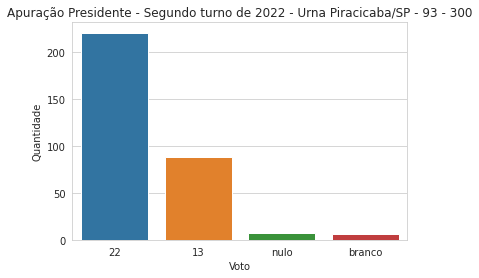

In [ ]:
with sns.axes_style('whitegrid'):
  chart = sns.barplot(data=agregacaoVotos, x=x_column, y=y_column)
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable);

Nesta segunda visualização, vamos observar a **quantidade de votos relativos**.

In [ ]:
x_column = 'voto'
y_column = 'quantidade_pct'

In [ ]:
title = f'Apuração Presidente - Segundo turno de 2022 - Urna {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade (%)'

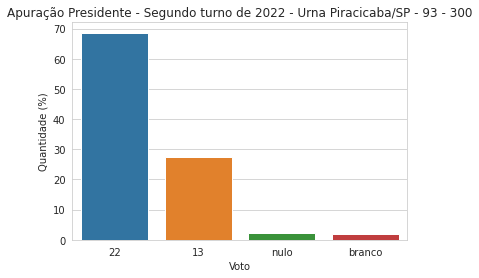

In [ ]:
with sns.axes_style('whitegrid'):
  chart = sns.barplot(data=agregacaoVotos, x=x_column, y=y_column)
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable);

## 5\. Divulgação

Nesta aula vamos aprender a expor o nossa análise de dados.

### **5.1. Kaggle**

[Kaggle](https://www.kaggle.com/) é a maior comunidade online de ciência de dados e aprendizado de máquina. A plataforma permite que usuários encontrem e publiquem **conjuntos de dados**, construam e compartilhem **notebooks** (como este do Google Colab) e participem de **competições** (que pagam muito dinheiro as vezes).

> Vamos publicar nosso **notebook** na plataforma web do Kaggle para que você possa compartilhar tudo o que você aprendeu nestas aulas e compor o seu portfólio.

 - Crie uma conta no Kaggle;
 - Faça o *download* do *notebook* do Google Colab;
 - Faça o *upload* do *notebook* no Kaggle.